In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install kaggle


In [9]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
px.scatter(data_frame=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [15]:
df_agglomorative = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_agglomorative

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


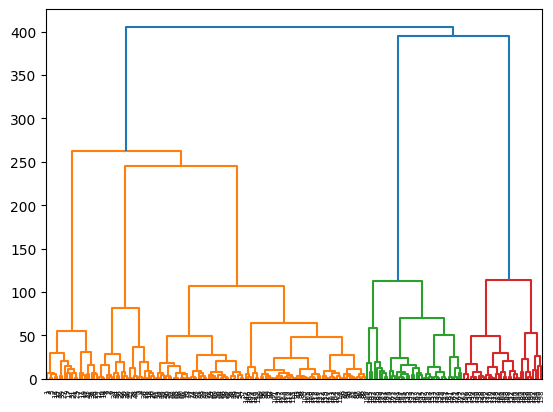

In [16]:
from scipy.cluster.hierarchy import dendrogram , linkage

dendrogram(linkage(df_agglomorative,method="ward"));

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_values=range(2,11)
silhouette_score_list=[]

for k in k_values:
    agglomorative=AgglomerativeClustering(n_clusters=k)
    label=agglomorative.fit_predict(df_agglomorative)

    score=round(silhouette_score(df_agglomorative,label),2)
    silhouette_score_list.append(score)

In [18]:
print(silhouette_score_list)

[np.float64(0.37), np.float64(0.46), np.float64(0.49), np.float64(0.55), np.float64(0.54), np.float64(0.52), np.float64(0.43), np.float64(0.44), np.float64(0.43)]


In [19]:
px.line(x = k_values, y= silhouette_score_list, markers= True, labels= {'x' : 'No of Clusters', 'y' : 'Silhouette Score'})